## Imports

In [1]:
# import dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data

This database contains 14 physical attributes based on physical testing of a patient. Blood samples are taken and the patient also conducts a brief exercise test. The "goal" field refers to the presence of heart disease in the patient. It is integer (0 for no presence, 1 for presence). In general, to confirm 100% if a patient has heart disease can be quite an invasive process, so if we can create a model that accurately predicts the likelihood of heart disease, we can help avoid expensive and invasive procedures.

Content

Attribute Information:

* age: age in years
* sex: sex (1 = male; 0 = female)
* cp: chest pain type (4 values)
    * Value 1: typical angina
    * Value 2: atypical angina
    * Value 3: non-anginal pain
    * Value 4: asymptomatic
* trestbps: resting blood pressure (in mm Hg on admission to the hospital)
* chol: serum cholestoral in mg/dl
* fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg: resting electrocardiographic results
    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* thalach: maximum heart rate achieved
* exang: exercise induced angina (1 = yes; 0 = no)
* oldpeak = ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
    * Value 1: upsloping
    * Value 2: flat
    * Value 3: downsloping
* ca: number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target:0 for no presence of heart disease, 1 for presence of heart disease

Original Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Creators:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

In [2]:
# read in the data, display first 5 rows

heart_data=pd.read_csv('heart.csv')

heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## EDA

In [3]:
heart_data.shape

(303, 14)

In [4]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Data types are in order and we don't have any null values. That's great.

In [6]:
heart_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


The features are in very different scales. Naive Bayes does not require feature scaling but we lose nothing by scaling so we will.

In [7]:
heart_data['target'].value_counts(normalize=True)*100

1    54.455446
0    45.544554
Name: target, dtype: float64

<AxesSubplot:xlabel='target', ylabel='count'>

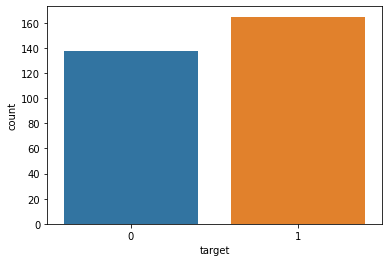

In [8]:
sns.countplot(x='target', data=heart_data)

There is a 54-46 percent split in the target value so we don't need to worry about class imbalance.

Text(0.5, 1.0, 'Age Distribution')

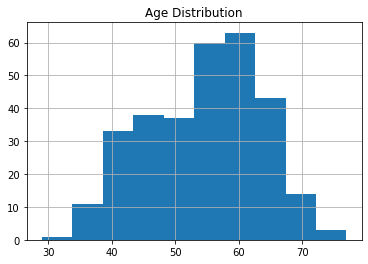

In [9]:
# distribution of ages

heart_data['age'].hist()
plt.title('Age Distribution')

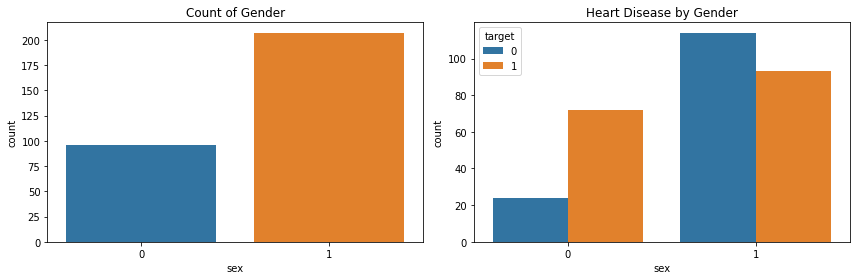

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
sns.countplot(x='sex',data=heart_data, ax=axes[0])
axes[0].set_title('Count of Gender')
sns.countplot(x='sex',data=heart_data,hue='target', ax=axes[1])
axes[1].set_title('Heart Disease by Gender')
plt.tight_layout()

There are twice as many males as females in our data

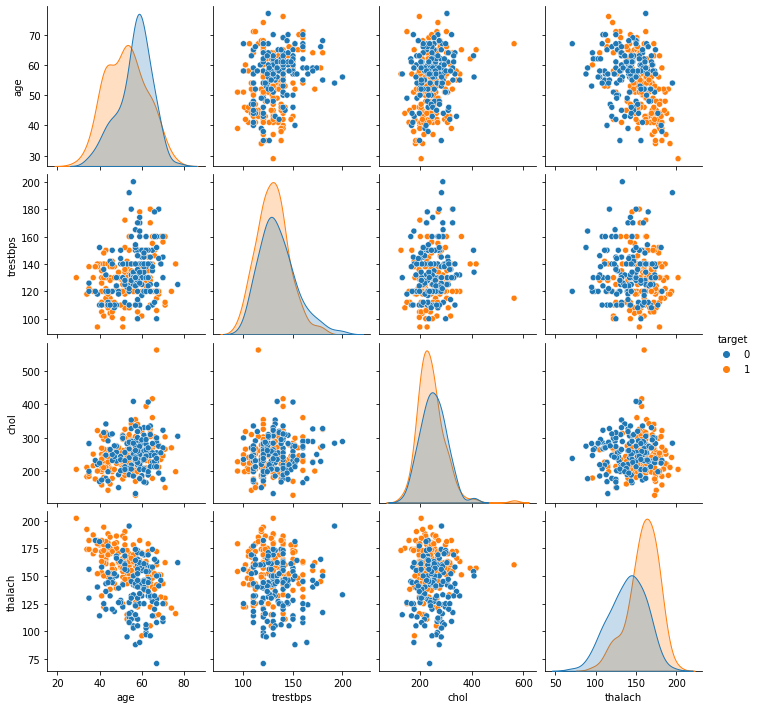

In [11]:
# a pairplot of a subset of features

sns.pairplot(data=heart_data[['age','trestbps', 'chol','thalach','target']],hue='target')

In [12]:
# correlation between the features and target label

heart_data.corr()['target'][:-1].sort_values(ascending=False)

cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

<AxesSubplot:>

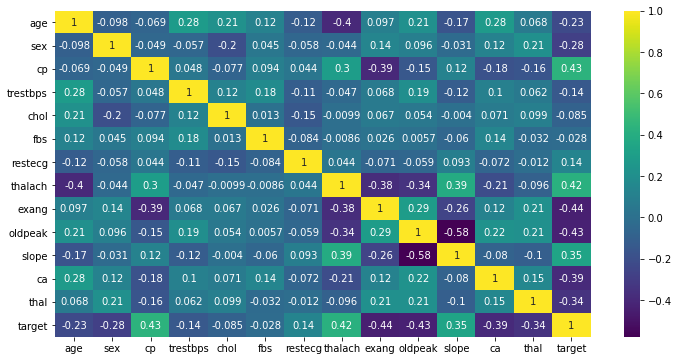

In [13]:
plt.figure(figsize=(12,6))
sns.heatmap(heart_data.corr(), annot=True, cmap='viridis')

## Data Preparation

In [14]:
# split the data into X (features) and y (label)

X=heart_data.drop('target', axis=1)
y=heart_data['target']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
# split our data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [17]:
# import standard scaler and instantiate it

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

In [18]:
# the actual scaling

scaled_X_train=scaler.fit_transform(X_train)
scaled_X_test=scaler.transform(X_test)

When scaling, only fit the training data because fitting the test set as well  would lead to data leakage.

It is not necessary to scale the target (y) as doing so would alter the definition of the target.

## The model

In [19]:
# Importing GaussianNB

from sklearn.naive_bayes import GaussianNB

`GaussianNB` was chosen as our features are `continuous` and those chosen for the pairplot appear bell-shaped (`normally distributed`).

In [20]:
# an instance of GaussianNB

gnb_model=GaussianNB()

In [21]:
# fit the model

gnb_model.fit(scaled_X_train, y_train)

GaussianNB()

## Results and Evaluation

In [22]:
# import the necessary evaluation metrics

from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, recall_score

In [23]:
# predict on the test set

preds=gnb_model.predict(scaled_X_test)

In [24]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83        44
           1       0.83      0.85      0.84        47

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.84        91



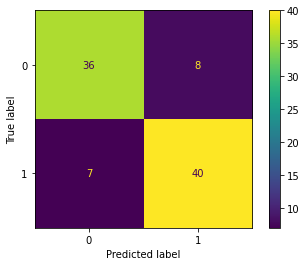

In [25]:
plot_confusion_matrix(gnb_model, scaled_X_test, y_test)

Our model resulted in 7 `false negatives` and 8 `false positives`. 

Since we are dealing with a medical condition, the cost of false negatives is much higher than that of false positives. Misdiagnosing a patient whose heart is actually diseased is life-threatening as they may not get the required medical attention in time. Recall score is the most appropriate metric in this case.

A recall score of 0.85 is decent.

To get better performance we could get more data, include other features or try a different algorithm.

### Thank you